## Объектно ориентированное API


![Title](https://248006.selcdn.ru/public/email/courses/Профессия%20Data%20Scientist/extended_fig_map.jpg)

## Subplots

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

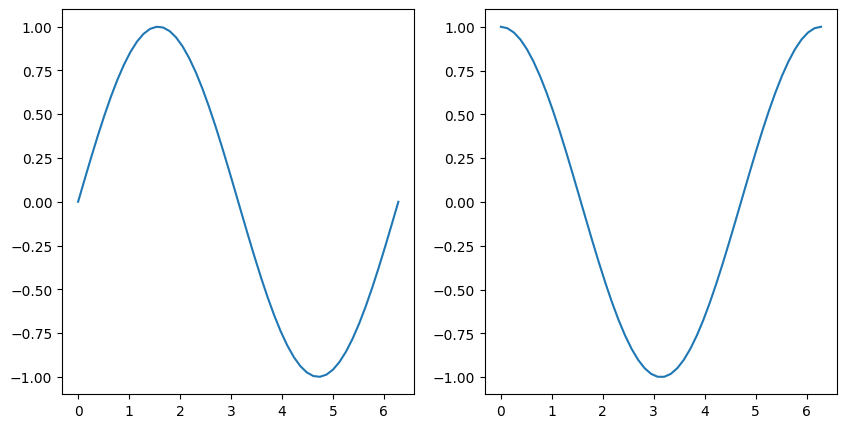

In [2]:
x = np.linspace(0, 2*np.pi, 50)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
plt.show()

In [3]:
data = pd.read_csv('Tesla.csv', parse_dates=True, index_col='Date')

In [4]:
from pandas.tseries.offsets import MonthEnd

def get_monthly_dates(data):
    date = data.index[0]
    dates = []
    while date < data.index[-1]:
        date = date + MonthEnd(1)
        dates.append(date)
    return dates

In [5]:
data.index[0]

Timestamp('2010-06-29 00:00:00')

In [6]:
import math

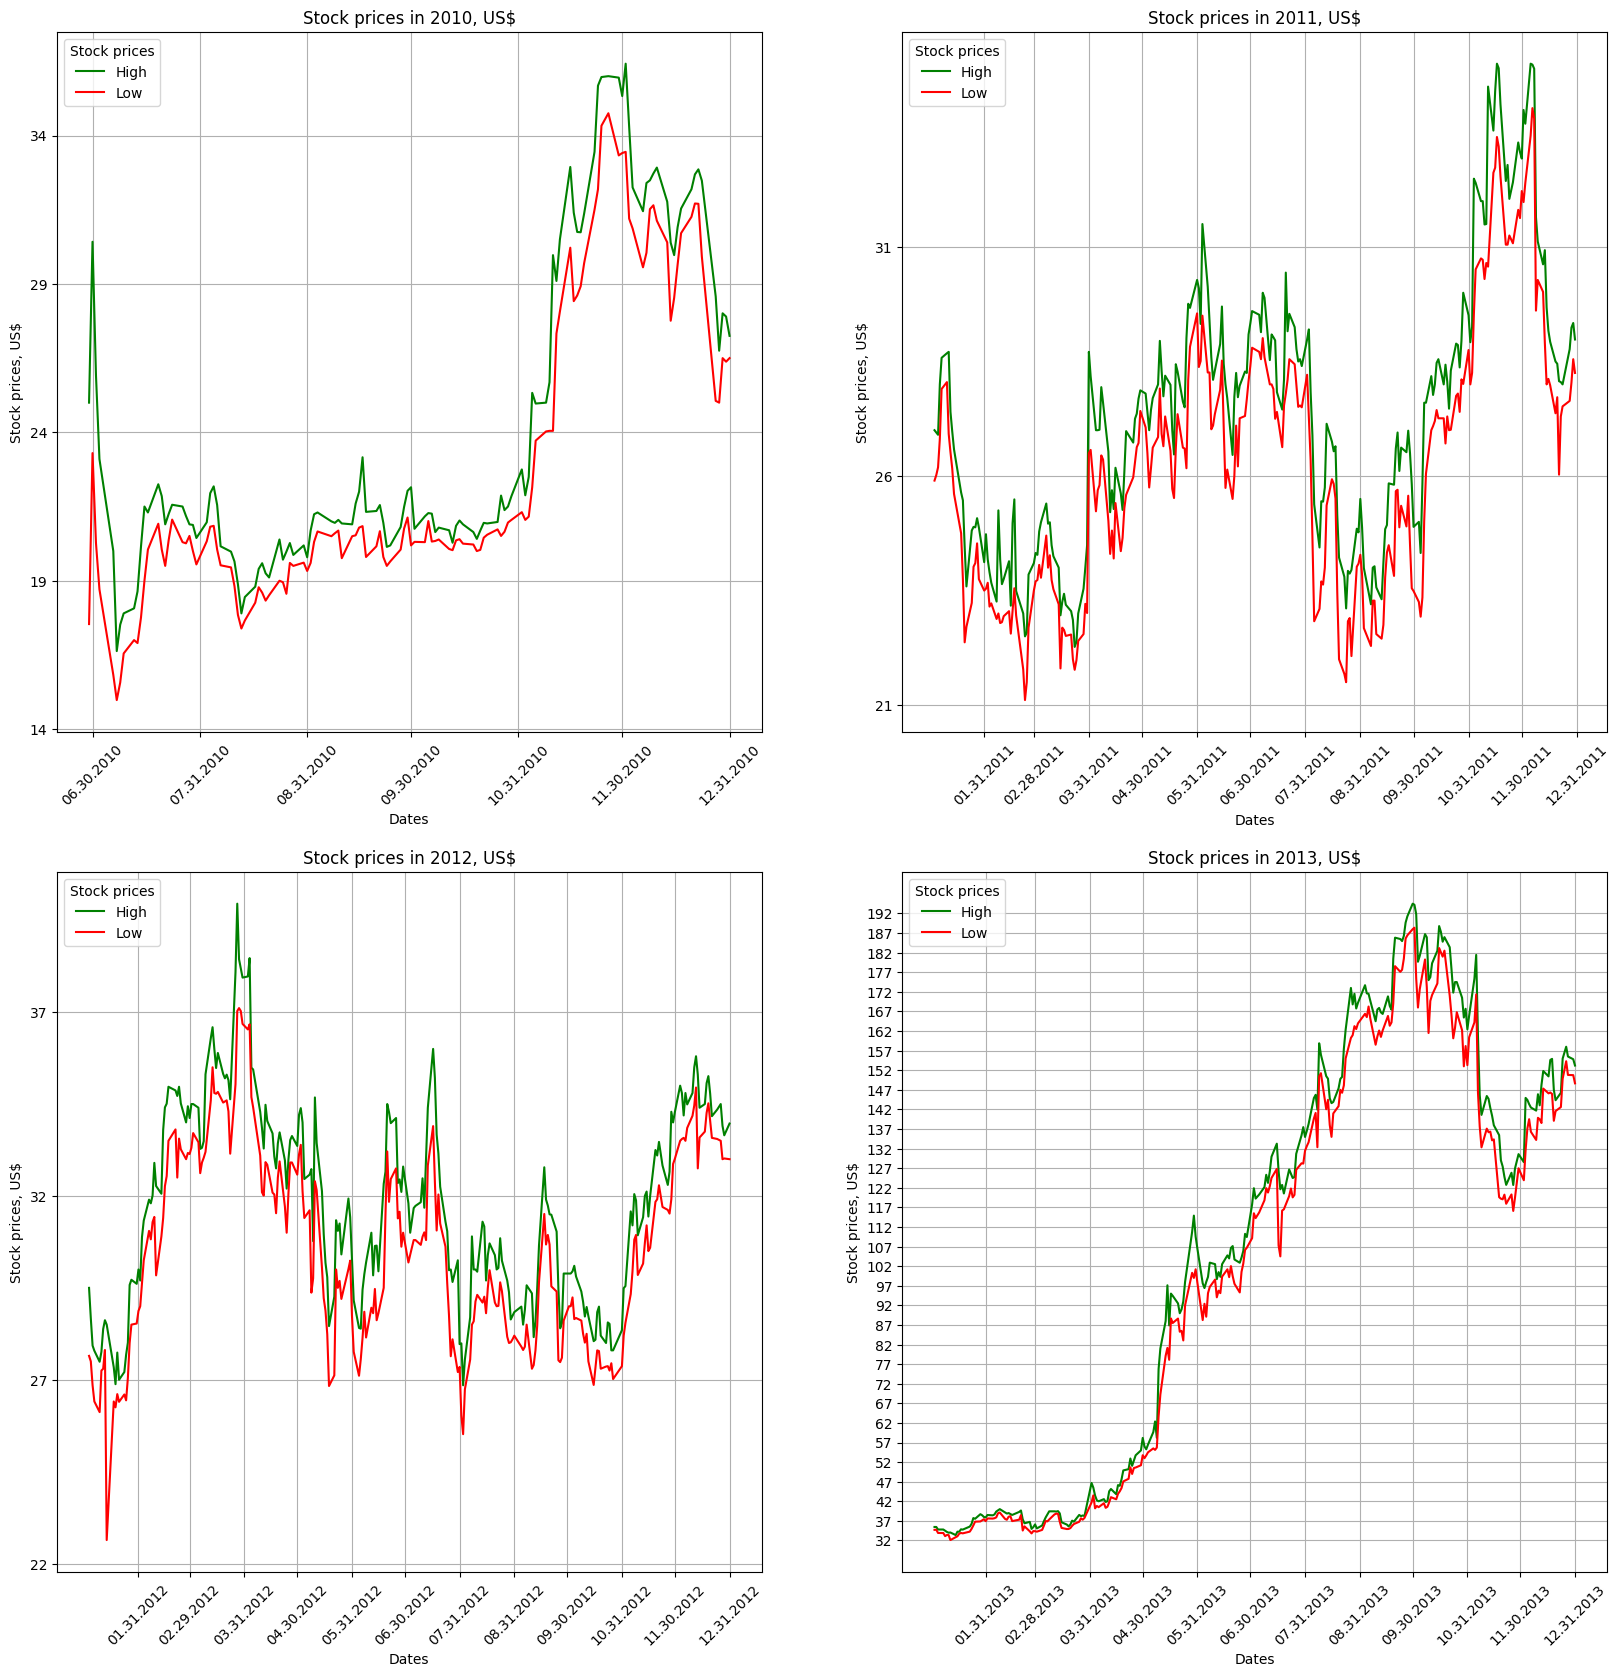

In [7]:
year = 2010

fig, axes = plt.subplots(2, 2, figsize=(20,20))

for row in range(2):
    for column in range(2):
        year_data = data[data.index.year == year]
        dates = get_monthly_dates(year_data)
        axes[row, column].plot(year_data.index, year_data['High'], label='High', color='g')
        axes[row, column].plot(year_data.index, year_data['Low'], label='Low', color='r')
        axes[row, column].set_title('Stock prices in {}, US$'.format(year))
        axes[row, column].set_xlabel('Dates')
        axes[row, column].set_ylabel('Stock prices, US$')
        axes[row, column].set_xticks(dates)
        axes[row, column].set_xticklabels([pd.to_datetime(str(date)).strftime("%m.%d.%Y")\
                                           for date in dates], rotation=45)
        yticks = range(math.floor(min(year_data['Low'])), math.ceil(max(year_data['High'])), 5)
        axes[row, column].set_yticks(yticks)
        axes[row, column].set_yticklabels(yticks)

        axes[row, column].grid()
        axes[row, column].legend(loc='upper left', title='Stock prices')

        year += 1

plt.show()

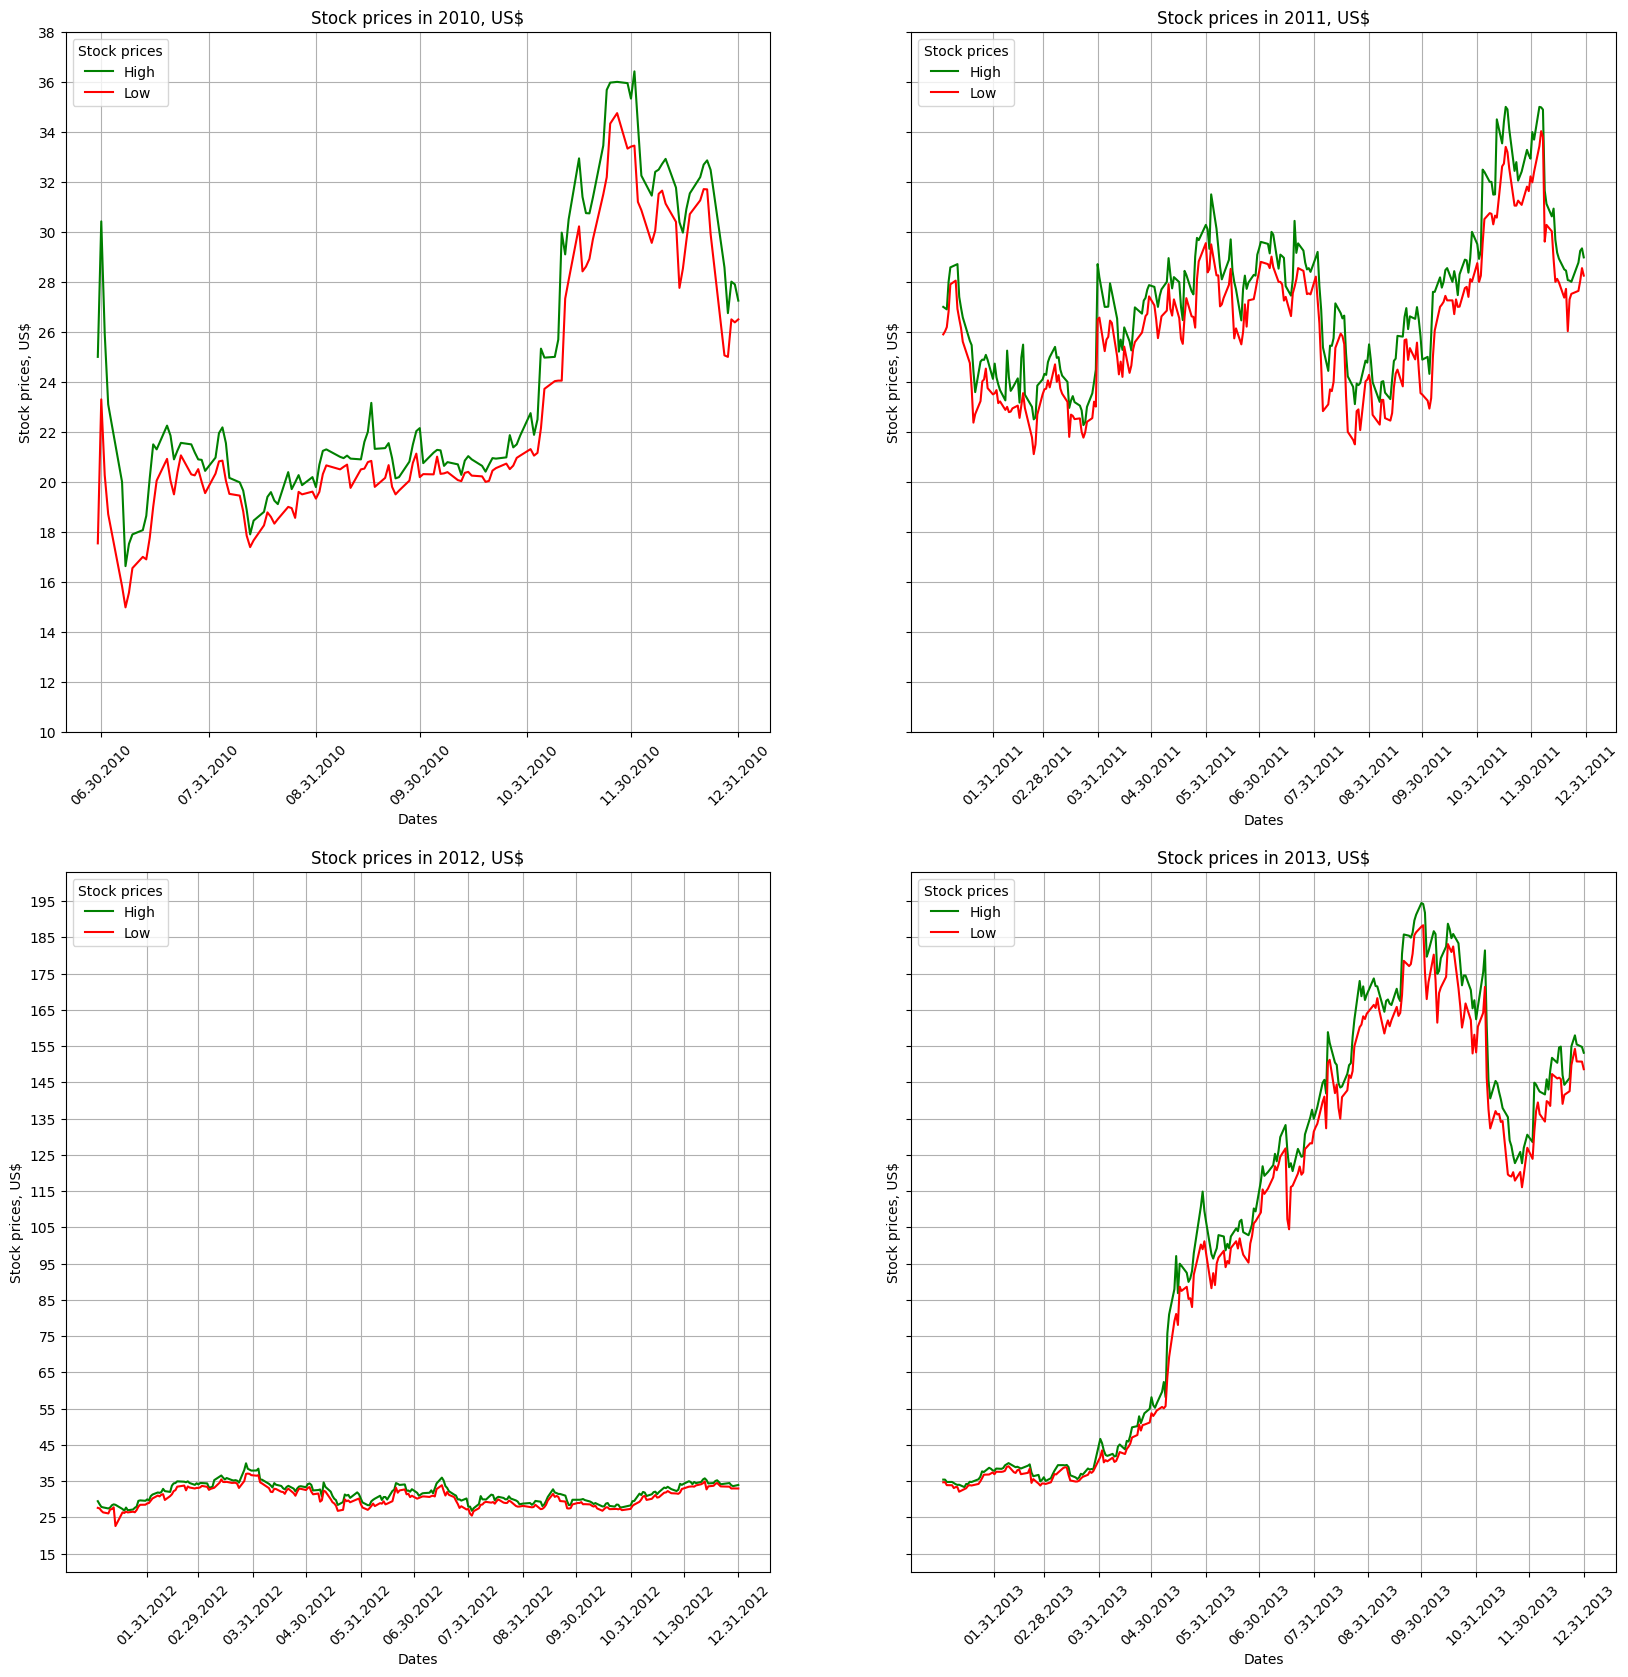

In [8]:
year = 2010

fig, axes = plt.subplots(2, 2, figsize=(20,20), sharey='row')

for row in range(2):
    for column in range(2):
        year_data = data[data.index.year == year]
        dates = get_monthly_dates(year_data)
        axes[row, column].plot(year_data.index, year_data['High'], label='High', color='g')
        axes[row, column].plot(year_data.index, year_data['Low'], label='Low', color='r')
        axes[row, column].set_title('Stock prices in {}, US$'.format(year))
        axes[row, column].set_xlabel('Dates')
        axes[row, column].set_ylabel('Stock prices, US$')
        axes[row, column].set_xticks(dates)
        axes[row, column].set_xticklabels([pd.to_datetime(str(date)).strftime("%m.%d.%Y")\
                                           for date in dates], rotation=45)
        axes[row, column].grid()
        axes[row, column].legend(loc='upper left', title='Stock prices')

        year += 1

plt.setp(axes[0:], yticks=range(10, 40, 2), yticklabels=range(10, 40, 2))
plt.setp(axes[1:], yticks=range(15, 200, 10), yticklabels=range(15, 200, 10))
plt.show()

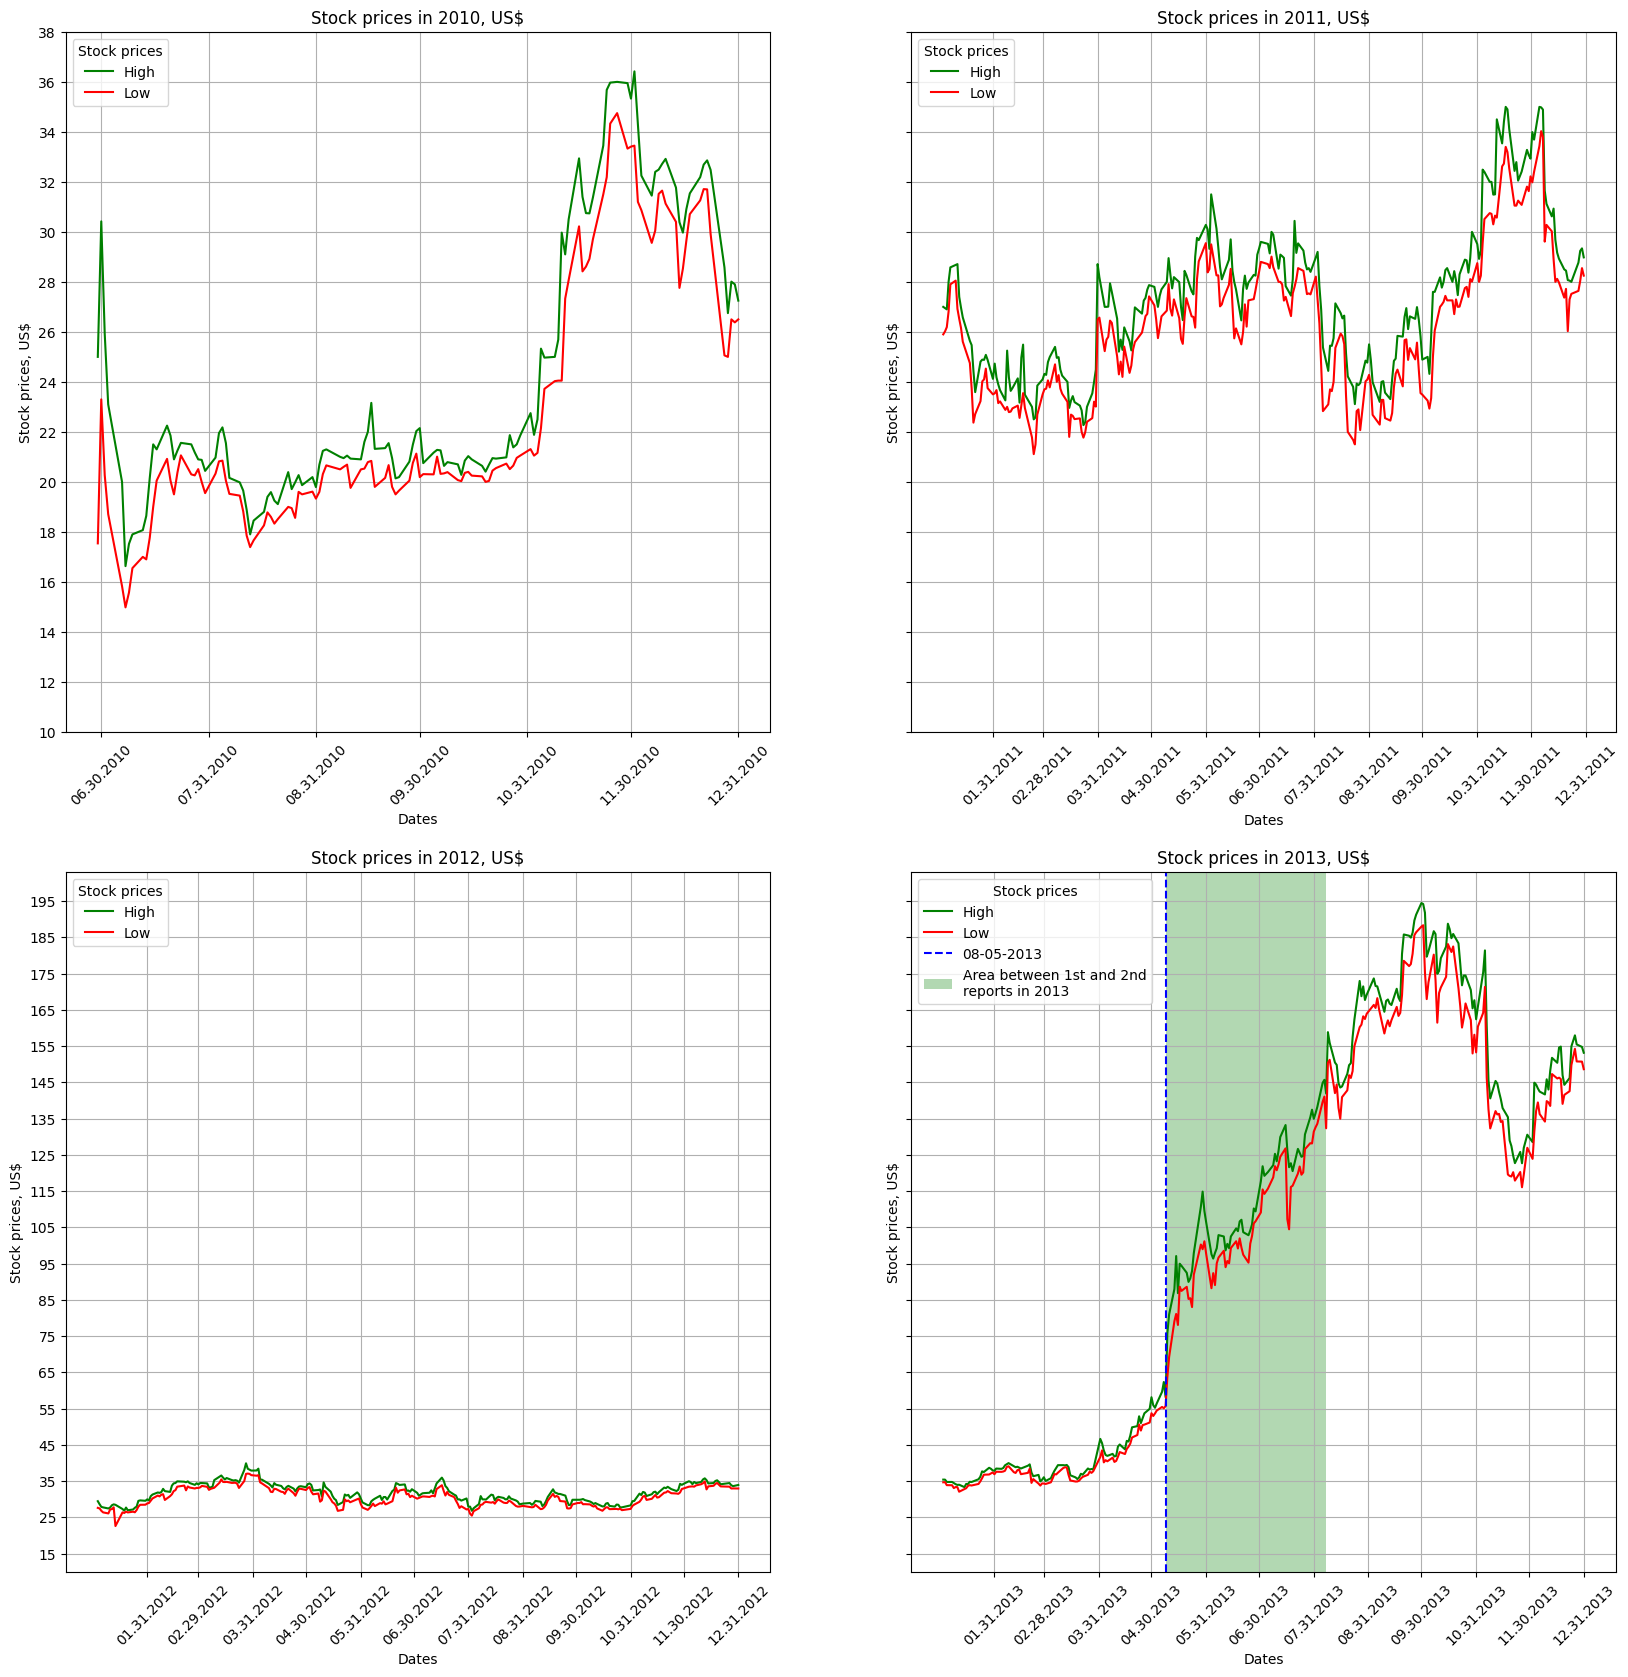

In [9]:
year = 2010
first_profit_report_date = pd.Timestamp(day=8, month=5, year=2013)
second_after_profit_report_date = pd.Timestamp(day=7, month=8, year=2013)

fig, axes = plt.subplots(2, 2, figsize=(20,20), sharey='row')

for row in range(2):
    for column in range(2):
        year_data = data[data.index.year == year]
        dates = get_monthly_dates(year_data)
        axes[row, column].plot(year_data.index, year_data['High'], label='High', color='g')
        axes[row, column].plot(year_data.index, year_data['Low'], label='Low', color='r')
        axes[row, column].set_title('Stock prices in {}, US$'.format(year))
        axes[row, column].grid()
        axes[row, column].set_xticks(dates)
        axes[row, column].set_xticklabels([pd.to_datetime(str(date)).strftime("%m.%d.%Y")\
                                           for date in dates], rotation=45)
        year += 1

        axes[row, column].legend(loc='upper left', title='Stock prices')

plt.setp(axes[0:], yticks=range(10, 40, 2), yticklabels=range(10, 40, 2))
plt.setp(axes[1:], yticks=range(15, 200, 10), yticklabels=range(15, 200, 10))
plt.setp(axes, xlabel='Dates', ylabel='Stock prices, US$')

axes[1, 1].axvline(first_profit_report_date, ls='--', color='b', label=first_profit_report_date.strftime("%d-%m-%Y"))
axes[1, 1].axvspan(first_profit_report_date, second_after_profit_report_date, facecolor='g', alpha=0.3,
                   label='Area between 1st and 2nd\nreports in 2013')
plt.legend(loc='upper left', title='Stock prices')

plt.show()

## Дополнительные материалы
[Сборник с базовыми примерами по отрисовке основных графиков](https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html)

[Функции модуля pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

[Галерея примеров более сложных графиков](https://matplotlib.org/3.2.1/gallery/index.html)

[Обзор разных инструментов matplotlib](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)

## Домашнее задание
- Постройте с помощью subplots графики цены для датасета aws spot prices для ОС Windows и всех архитектур вида i*.

*Обратите внимание на то, какой лучше сделать период между датами для удобного отображения.